# Example of inference with a KeypointRCNN_ResNet50_FPN pre-trained model

In the code below, we are going to use the KeypointRCNN_ResNet50_FPN_Weights model pre-trained on the COCO dataset to get keypoints of people.

Import libraries

In [2]:
import torch
import torchvision
from torchvision.models.detection import KeypointRCNN_ResNet50_FPN_Weights
from time import time
import kornia as K
import cv2
import matplotlib.pyplot as plt

Load the model

In [3]:
model = torchvision.models.detection.keypointrcnn_resnet50_fpn(weights=KeypointRCNN_ResNet50_FPN_Weights.DEFAULT)
model.to('cuda').eval()
print(model)

KeypointRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(640, 672, 704, 736, 768, 800), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.

In [4]:
result = model(torch.rand(1, 3, 224, 224).to('cuda'))
print(result)

[{'boxes': tensor([[  0.0000,   0.0000, 219.4486, 222.3195]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([1], device='cuda:0'), 'scores': tensor([0.0650], device='cuda:0', grad_fn=<IndexBackward0>), 'keypoints': tensor([[[  0.6998, 221.6195,   1.0000],
         [  0.6998, 221.6195,   1.0000],
         [  0.6998, 221.6195,   1.0000],
         [  0.6998, 221.6195,   1.0000],
         [  0.6998, 221.6195,   1.0000],
         [218.7488, 107.0997,   1.0000],
         [218.7488, 160.0196,   1.0000],
         [208.1123,  22.2599,   1.0000],
         [218.7488, 221.6195,   1.0000],
         [ 12.4559, 209.8595,   1.0000],
         [ 98.3880,  22.8199,   1.0000],
         [204.1936,  28.4199,   1.0000],
         [ 23.9322,  91.6998,   1.0000],
         [  9.3769, 163.3796,   1.0000],
         [218.7488, 221.6195,   1.0000],
         [ 16.0948, 210.4195,   1.0000],
         [ 15.5349, 221.6195,   1.0000]]], device='cuda:0',
       grad_fn=<CopySlices>), 'keypoints_scores

Load an image an run it through the model

78.11141014099121
30.09963035583496
27.584075927734375
25.54154396057129
25.328874588012695


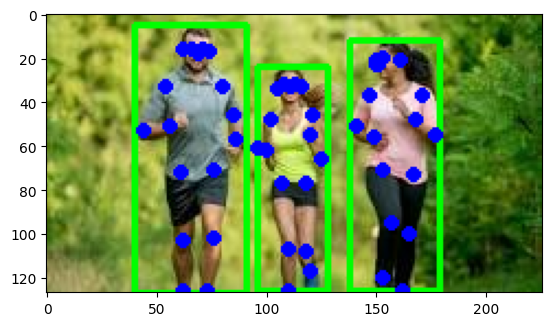

In [5]:
# load image
input_image = cv2.imread('images.jpg')

# resize image
img = cv2.resize(input_image, (input_image.shape[1]//1, input_image.shape[0]//1))

# convert to rgb
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

output_image = img.copy()

# inference n times
for i in range(5):
    start = time()
    predictions = model((K.image_to_tensor(img, False).float() / 255.).to('cuda'))  
    keypoints = predictions[0]['keypoints'].detach().cpu().numpy()
    boxes = predictions[0]['boxes'].detach().cpu().numpy()
    print(str((time() - start)*1000))

for i in range(len(predictions[0]['scores'])):
    if predictions[0]['scores'][i] > 0.5:
        cv2.rectangle(output_image, (int(boxes[i][0]), int(boxes[i][1])), (int(boxes[i][2]), int(boxes[i][3])), (0, 255, 0), 2)
        for j in range(len(keypoints[i])):
            cv2.circle(output_image, (int(keypoints[i][j][0]), int(keypoints[i][j][1])), 2, (0, 0, 255), 2)
# imshow
plt.imshow(output_image)
plt.show()

How results looks like:

In [6]:
print(predictions)

[{'boxes': tensor([[138.0431,  12.4897, 179.9373, 126.5227],
        [ 40.2511,   5.4987,  91.1765, 127.0000],
        [ 96.4902,  24.3399, 128.6992, 126.6317],
        [ 76.9196,  24.8917, 113.7671, 125.6569],
        [140.0664,  11.7250, 179.8232,  65.8924]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([1, 1, 1, 1, 1], device='cuda:0'), 'scores': tensor([0.9998, 0.9997, 0.9993, 0.3574, 0.0611], device='cuda:0',
       grad_fn=<IndexBackward0>), 'keypoints': tensor([[[151.5273,  23.0797,   1.0000],
         [153.9018,  20.7076,   1.0000],
         [150.8488,  21.2159,   1.0000],
         [161.8736,  21.5548,   1.0000],
         [150.1704,  23.2491,   1.0000],
         [171.5415,  37.6515,   1.0000],
         [147.6262,  37.6515,   1.0000],
         [177.6476,  55.2733,   1.0000],
         [141.8594,  51.2067,   1.0000],
         [168.6581,  48.8346,   1.0000],
         [149.8311,  56.6288,   1.0000],
         [167.9797,  73.2339,   1.0000],
         [153.0538, 

In [11]:
predictions[0]

{'boxes': tensor([[138.0431,  12.4897, 179.9373, 126.5227],
         [ 40.2511,   5.4987,  91.1765, 127.0000],
         [ 96.4902,  24.3399, 128.6992, 126.6317],
         [ 76.9196,  24.8917, 113.7671, 125.6569],
         [140.0664,  11.7250, 179.8232,  65.8924]], device='cuda:0',
        grad_fn=<StackBackward0>),
 'labels': tensor([1, 1, 1, 1, 1], device='cuda:0'),
 'scores': tensor([0.9998, 0.9997, 0.9993, 0.3574, 0.0611], device='cuda:0',
        grad_fn=<IndexBackward0>),
 'keypoints': tensor([[[151.5273,  23.0797,   1.0000],
          [153.9018,  20.7076,   1.0000],
          [150.8488,  21.2159,   1.0000],
          [161.8736,  21.5548,   1.0000],
          [150.1704,  23.2491,   1.0000],
          [171.5415,  37.6515,   1.0000],
          [147.6262,  37.6515,   1.0000],
          [177.6476,  55.2733,   1.0000],
          [141.8594,  51.2067,   1.0000],
          [168.6581,  48.8346,   1.0000],
          [149.8311,  56.6288,   1.0000],
          [167.9797,  73.2339,   1.0000],
 